# Course 2 Assignment 2

For this assignment we needed to conduct a Chi Squared test.

Which will mean converting my data to categorical data.

In [1]:
# import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

## Loading and preparing data

In [2]:
# show all columns
pd.set_option('display.max_columns', None)
# loading the data from the local file
df = pd.read_csv('data/covid_data.csv')
# prepare data
df.date = pd.to_datetime(df.date)
dfx = df.dropna(subset=['continent'])  # gets rid of summaries for 'world' and 'africa' etc, as I only want data for countries
# so as to compare like with like, I'm keeping only countries with human development indices over 0.9
dfx = dfx[dfx.human_development_index > 0.9]

I want to compare mean stringency index per country, i.e. how strict lockdown conditions have been imposed overall, with total cases per million people. To do this, I will group by location, and use aggregate functions.

In [3]:
dfx = dfx.dropna(subset=['new_cases_per_million', 'stringency_index'])  # get rid of countries with no data in these columns
cols = {'stringency_index':'mean_stringency_index', 'new_cases_per_million':'total_cases_per_million'}
dfy = dfx.groupby('location').agg({'stringency_index':'mean', 'new_cases_per_million':'sum'}).rename(columns=cols)
dfy

,mean_stringency_index,total_cases_per_million
location,,
Australia,58.083509,1163.924
Austria,61.290330,67154.806
Belgium,58.335448,83871.729
Canada,62.882445,31071.270
Denmark,56.735674,42765.082
Finland,43.629226,15450.522
France,60.171329,81662.054
Germany,61.854075,39283.099
Iceland,45.430733,18725.259


In [4]:
# cutting them into bins to make them categorical
# since chi square tests are only interpretable when the response variable has 2 levels, I will do 2 bins
dfy['stringency_rating'] = pd.cut(dfy.mean_stringency_index, 
                                  2, 
                                  labels=['low restrictions', 'high restrictions'])
dfy['total_cases_rating'] = pd.cut(dfy.total_cases_per_million, 
                                   2, 
                                   labels=['low cases', 'high cases'])
dfy

,mean_stringency_index,total_cases_per_million,stringency_rating,total_cases_rating
location,,,,
Australia,58.083509,1163.924,high restrictions,low cases
Austria,61.290330,67154.806,high restrictions,high cases
Belgium,58.335448,83871.729,high restrictions,high cases
Canada,62.882445,31071.270,high restrictions,low cases
Denmark,56.735674,42765.082,high restrictions,low cases
Finland,43.629226,15450.522,low restrictions,low cases
France,60.171329,81662.054,high restrictions,high cases
Germany,61.854075,39283.099,high restrictions,low cases
Iceland,45.430733,18725.259,low restrictions,low cases


## Chi Square Test

In [5]:
# making crosstab
ct = pd.crosstab(dfy.stringency_rating, dfy.total_cases_rating)
ct

total_cases_rating,low cases,high cases
stringency_rating,,
low restrictions,7,1
high restrictions,5,11


In [6]:
# column percentages
ct/(ct.sum(axis=0))

total_cases_rating,low cases,high cases
stringency_rating,,
low restrictions,0.583333,0.083333
high restrictions,0.416667,0.916667


In [7]:
# chi-square
ch, p, df, ex = stats.chi2_contingency(ct)
print(f'Chi-square value: {ch}')
print(f'p-value: {p}')
print(f'Degrees of freedom: {df}')
print(f'Expected counts: \n{ex}')

Chi-square value: 4.6875
p-value: 0.030382821976577483
Degrees of freedom: 1
Expected counts: 
[[4. 4.]
 [8. 8.]]


### graph of stringency rating against total cases per million people

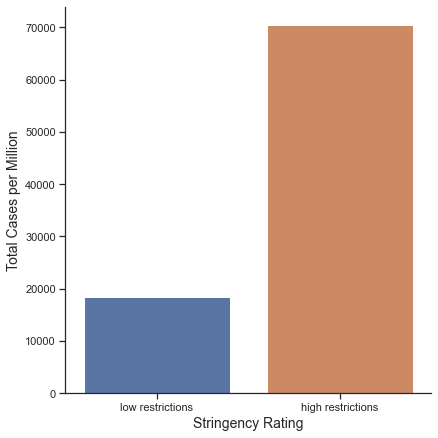

In [8]:
sns.set_theme(style="ticks")
g = sns.catplot(data=dfy, x='stringency_rating', y='total_cases_per_million', kind='bar', ci=None, height=6)
g.set_axis_labels('Stringency Rating', 'Total Cases per Million', fontsize=14)
_ = g

## Summary

A Chi-square test to examine the association between stringency ratings (catagorical explanatory) and total case ratings (categorical response) was performed. 

Because the explanatory variable had only 2 levels, no post-hoc paired comparisons were necessary.

It revealed that in countries with a Human Dependency Index over 0.9 (my sample), those with high restrictions were more likely to have a high level of covid-19 cases (91.7%) than countries with low levels of restrictions (8.3%), X2 = 4.6875, 1 df, p = 0.03. 

I suspect that it is actually the high level of cases causing the high levels of restrictions rather than the other way around, but it is impossible to say from this analysis, which was performed only to demonstrate a chi-square test.